# *SQL e Python no Mundo do Futebol e suas possíveis aplicações*

## <u>Com Python...<u/>

Para o  Algoritmo de Árvore de decisão simulei uma situação onde conto com um dataset com diversas informações classificando as pessoas que recebem  mais ou menos que 25 mil reais anuais, sendo essas pessoas, sócios torcedores de um time x. O objetivo é funcionar como uma empresa que vende relatórios de inteligência para que possam ser aproveitados pelos clubes de futebol.

##### O que é árvore de decisão?
A árvore de Decisão é um tipo de algoritmo de aprendizagem de máquina supervisionado que se baseia na ideia de divisão dos dados em grupos homogêneos. Na imagem abaixo vemos uma árvore de decisão extremamente simples, apenas com dois nós e poucos ramos.

![](Images/arv1.JPG)

É claro que, em uma situação como esta, não será necessário um algoritmo que nos diga se iremos a praia ou não, mas a ideia é válida para este aprendizado. Entendendo como esta árvore foi criada, você entenderá a lógica de uma árvore de decisão.
![](Images/arv2.JPG)

Esta é a tabela que levou à criação da árvore apresentada. Como podemos ver, todas as vezes em que a coluna “Sol?” é igual a “Não”, a pessoa não foi para praia. Esta coluna foi utilizada na primeira pergunta, ou no primeiro nó de nossa árvore, sendo que sempre que a informação na coluna “Sol?” for “Não”, nossa árvore de decisão responderá que a pessoa não foi para praia. Porém quando esta resposta for “Sim”, temos casos onde a pessoa foi para praia e outros em que ela não foi. Ou seja, é necessário fazermos mais uma pergunta para definirmos a resposta, levando assim a segunda pergunta, ou segundo nó de nossa árvore, que irá conferir a informação existente na coluna “Vento?”. É importante observamos que esta mesma tabela poderia levar a construção de uma árvore diferente. Se primeiramente conferirmos o valor da variável “Vento?” veremos que em todos os dias com vento não fomos para praia. Em dias sem vento, conferimos também se havia sol, para então definir a resposta final.
![](Images/arv3.JPG)

Neste simples exemplo vemos que normalmente não existirá uma única árvore de decisão para um mesmo problema, sendo que com diferentes árvores poderemos chegar a um mesmo resultado. Assim como podemos ter mais de uma árvore para um mesmo problema, também podemos utilizar diferentes métodos de cálculo na criação de uma árvore de decisão. Estes métodos são os responsáveis pela definição da estrutura e resultado final da árvore, e tentam buscar a estrutura mais otimizada para o problema em questão.
![](Images/arv4.JPG)

Imagine que em nosso exemplo anterior os dados fossem um pouco diferentes, sendo que em todos os dias de sol fomos para a praia, e em dias sem sol, não fomos. Nesta situação, a árvore não precisaria conferir se existe vento ou não, pois independente desta informação o resultado seria o mesmo. Ou seja, nossa variável target “Vou para praia?” seria totalmente explicada pela variação da variável preditora “Sol?”, resultando em uma árvore com apenas um nó. Os métodos utilizados pelos algoritmos irão buscar justamente estas variáveis dentre todas as preditoras, identificando aquelas que possuem maior relação com a variável target, e colocando-as no topo da árvore, em seus nós principais.
<br>
<br>
Estes são alguns dos métodos utilizados para estas definições:

1. Entropia – através da entropia o algoritmo verifica como os dados estão distribuídos nas variáveis preditoras de acordo com a variação da variável target. Quanto maior a entropia, maior a desordem dos dados; e quanto menor, maior será a ordem destes dados, quando analisados pela ótica da variável target. Partindo da entropia, o algoritmo confere o ganho de informação de cada variável. Aquela que apresentar maior ganho de informação será a variável do primeiro nó da árvores. Podemos entender o ganho de informação como a medida de quão bem relacionados os dados da variável preditora estão com os dados da variável target (ou o quanto a variável target pode ser explicada a partir da variável preditora), sendo que a variável com melhor desempenho será a escolhida para iniciar a árvore.

2. Índice GINI – com o cálculo do índice GINI, assim como na Entropia, será verificada a distribuição dos dados nas variáveis preditoras de acordo com a variação da variável target, porém com um método diferente. A variável preditora com o menor índice Gini será a escolhida para o nó principal da árvore, pois um baixo valor do índice indica maior ordem na distribuição dos dados.

3. Regressão – nos problemas de regressão nosso objetivo é prever um valor, e não uma classe. Para isso a árvore utilizará os conceitos de média e desvio padrão, que possibilitarão um resultado final numérico. Para definir as variáveis preditoras dos nós principais em um problema de regressão, será calculado o desvio padrão dos valores da variável target para cada variável preditora, de acordo com suas variações. Desta forma teremos um valor de desvio padrão para cada variável preditora e, comparando-o com o desvio padrão da variável target completa, chegaremos a redução de desvio padrão que a variável preditora em questão aplicou sobre a variável target. Lembrando que o desvio padrão indica o quão distante os valores estão da média, podemos entender que uma variável com grande redução de desvio padrão indica que através dela a variável target se aproxima da média, mostrando uma grande relação entre a variável preditora e a variável target. Portanto, a variável preditora com maior redução de desvio padrão será escolhida para o nó principal da árvore.

#### Importando todas as bibliotecas necessárias

In [1]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import joblib

%matplotlib inline
mpl.rcParams['figure.dpi']= 100

#### Leitura dos dataframes

In [2]:
df = pd.read_csv('adult2.csv',names=[
        "Idade", "Classe de Trabalho", "Peso Final", "Educacao", "Id_Educacao", "Estado Civil",
        "Ocupacao", "Relacao", "Raca", "Sexo", "Ganho de Capital", "Perda de Capital",
        "Horas-Por-Semana", "Nacionalidade", "Ganho Anual"], # Traduzindo colunas para o português
        sep=r'\s*;\s*',
        engine='python',
        na_values="?", skiprows = 1).dropna() # Linha de código feita para excluir linhas que contém dados faltantes
df

,Idade,Classe de Trabalho,Peso Final,Educacao,Id_Educacao,Estado Civil,Ocupacao,Relacao,Raca,Sexo,Ganho de Capital,Perda de Capital,Horas-Por-Semana,Nacionalidade,Ganho Anual
0,50,Trabalhador-nao-autonomo,83311,Bacharelado,13,Conjuge-civ-casado,Executivo-gerencial,Marido,Branco,Masculino,0,0,13,Brasil,<=25K
1,38,Privado,215646,Formado-EM,9,Divorciado,Limpeza,Nao-membro-da-familia,Branco,Masculino,0,0,40,Brasil,<=25K
2,53,Privado,234721,2-colegial,7,Conjuge-civ-casado,Limpeza,Marido,Negro,Masculino,0,0,40,Brasil,<=25K
3,28,Privado,338409,Bacharelado,13,Conjuge-civ-casado,Profissional-especializado,Esposa,Negro,Feminino,0,0,40,Brasil,<=25K
4,37,Privado,284582,Mestrado,14,Conjuge-civ-casado,Executivo-gerencial,Esposa,Branco,Feminino,0,0,40,Brasil,<=25K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Privado,257302,Associacao-academica,12,Conjuge-civ-casado,Suporte-Tecnico,Esposa,Branco,Feminino,0,0,38,Brasil,<=25K
32556,40,Privado,154374,Formado-EM,9,Conjuge-civ-casado,Operador-maquina,Marido,Branco,Masculino,0,0,40,Brasil,>25K
32557,58,Privado,151910,Formado-EM,9,Viuvo,Assistente-administrativo,Nao-casado,Branco,Feminino,0,0,40,Brasil,<=25K
32558,22,Privado,201490,Formado-EM,9,Nunca-casou,Assistente-administrativo,Filho-proprio,Branco,Masculino,0,0,20,Brasil,<=25K


#### Substituindo df por df_novo

In [3]:
df_novo = df

### Transformando as 'str' do dataset em números para o treinamento dos algoritmos

In [4]:
# Função 'embar_atrib'
def embar_atrib(atributo, alvo):
    dic_em_branco = {}
    localTargetData = {}
    for index, element in enumerate(atributo):
        if element not in localTargetData:
            if alvo[index] == '<=25K':
                localTargetData[element] = [1,0]
            else:
                localTargetData[element] = [0,1]
        else:
            if alvo[index] == '<=25K':
                localTargetData[element][0] +=1
            else:
                localTargetData[element][1] += 1
    return localTargetData

In [5]:
# Laço for responsável por fazer as trocas de 'str' por 'float' nos df's
for i in (1,3,5,6,7,8,9,13):
    replaceDict = embar_atrib(df_novo.iloc[:,i:i+1].values.transpose()[0].tolist(),df_novo.iloc[:,df_novo.shape[1]-1:df_novo.shape[1]].values.transpose()[0].tolist())
    for key in replaceDict:
        df_novo = df_novo.replace(key, replaceDict[key][1]/(replaceDict[key][1]+replaceDict[key][0]))
        print('Trocando {0} por {1}'.format(key, replaceDict[key][1]/(replaceDict[key][1]+replaceDict[key][0]) ))

Trocando Trabalhador-nao-autonomo por 0.2849271940181031
Trocando Privado por 0.21867289390200917
Trocando Chefe-de-estado por 0.27216653816499614
Trocando Governo-federal por 0.38645833333333335
Trocando Governo-municipal por 0.29479216435738176
Trocando Trabalhador-autonomo por 0.557347670250896
Trocando Sem-remuneracao por 0.0
Trocando Bacharelado por 0.4199961397413627
Trocando Formado-EM por 0.16342295345104335
Trocando 2-colegial por 0.056818181818181816
Trocando Mestrado por 0.5617910447761194
Trocando 9-ano por 0.056155507559395246
Trocando Faculdade por 0.19955719557195573
Trocando Associacao-academica por 0.25392156862745097
Trocando Curso-profissionalizante por 0.2634367903103709
Trocando 7ou8-ano por 0.06631762652705062
Trocando Doutorado por 0.7412060301507538
Trocando Pos-graduado por 0.7437275985663082
Trocando 5ou6-ano por 0.0462046204620462
Trocando 1-colegial por 0.07220216606498195
Trocando Pre-escola por 0.0
Trocando 3-colegial por 0.07888040712468193
Trocando 1ou4-

#### Substituindo as classes finais (>25K por 1; <=25K por 0) 

In [6]:
df_novo = df_novo.replace('>25K', 1)
df_novo = df_novo.replace('<=25K',0)

### Novo dataset

In [7]:
df_novo

,Idade,Classe de Trabalho,Peso Final,Educacao,Id_Educacao,Estado Civil,Ocupacao,Relacao,Raca,Sexo,Ganho de Capital,Perda de Capital,Horas-Por-Semana,Nacionalidade,Ganho Anual
0,50,0.284927,83311,0.419996,13,0.454774,0.484014,0.455683,0.264030,0.313802,0,0,13,0.249048,0
1,38,0.218673,215646,0.163423,9,0.107327,0.062774,0.106562,0.264030,0.313802,0,0,40,0.249048,0
2,53,0.218673,234721,0.056818,7,0.454774,0.062774,0.455683,0.129942,0.313802,0,0,40,0.249048,0
3,28,0.218673,338409,0.419996,13,0.454774,0.449034,0.491289,0.129942,0.113494,0,0,40,0.249048,0
4,37,0.218673,284582,0.561791,14,0.454774,0.484014,0.491289,0.264030,0.113494,0,0,40,0.249048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,0.218673,257302,0.253922,12,0.454774,0.304957,0.491289,0.264030,0.113494,0,0,38,0.249048,0
32556,40,0.218673,154374,0.163423,9,0.454774,0.124875,0.455683,0.264030,0.313802,0,0,40,0.249048,1
32557,58,0.218673,151910,0.163423,9,0.096429,0.134518,0.066035,0.264030,0.113494,0,0,40,0.249048,0
32558,22,0.218673,201490,0.163423,9,0.048633,0.134518,0.014586,0.264030,0.313802,0,0,20,0.249048,0


### Aplicando o algoritmo de Árvore de decisão

In [8]:
# Algoritmo da árvore de decisão
arv = tree.DecisionTreeClassifier()

In [9]:
# Diminuindo nosso dataset para uma melhor performance da máquina 
df_teste = df_novo.head(1000)
df_teste

,Idade,Classe de Trabalho,Peso Final,Educacao,Id_Educacao,Estado Civil,Ocupacao,Relacao,Raca,Sexo,Ganho de Capital,Perda de Capital,Horas-Por-Semana,Nacionalidade,Ganho Anual
0,50,0.284927,83311,0.419996,13,0.454774,0.484014,0.455683,0.264030,0.313802,0,0,13,0.249048,0
1,38,0.218673,215646,0.163423,9,0.107327,0.062774,0.106562,0.264030,0.313802,0,0,40,0.249048,0
2,53,0.218673,234721,0.056818,7,0.454774,0.062774,0.455683,0.129942,0.313802,0,0,40,0.249048,0
3,28,0.218673,338409,0.419996,13,0.454774,0.449034,0.491289,0.129942,0.113494,0,0,40,0.249048,0
4,37,0.218673,284582,0.561791,14,0.454774,0.484014,0.491289,0.264030,0.113494,0,0,40,0.249048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,34,0.218673,157886,0.253922,12,0.068822,0.041578,0.066035,0.264030,0.113494,0,0,40,0.249048,0
1063,49,0.218673,175958,0.199557,10,0.454774,0.269315,0.455683,0.264030,0.313802,0,0,80,0.249048,1
1064,38,0.218673,223004,0.199557,10,0.048633,0.041578,0.014586,0.264030,0.313802,0,0,40,0.249048,0
1065,35,0.218673,199352,0.743728,15,0.454774,0.449034,0.455683,0.264030,0.313802,0,1977,80,0.249048,1


In [10]:
# Atributos a serem considerados
X = np.array(df_teste.drop('Ganho Anual',1))

# Classe final
y = np.array(df_teste['Ganho Anual'])

In [11]:
# Normalização dos valores X e Y com a função 'fit()'
arv.fit(X,y)

DecisionTreeClassifier()

In [12]:
# Separando os X's e Y's para teste e treino (30% dos dados serão utilizados para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [13]:
# Normalização dos valores X_train e Y_train com a função 'fit()'
arv.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
# y_pred = valores preditos
y_pred = arv.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], d

In [15]:
# y_test = valores testados
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], d

[Text(207.7592941810345, 293.11764705882354, 'X[5] <= 0.281\ngini = 0.381\nsamples = 700\nvalue = [521, 179]'),
 Text(78.16810344827587, 275.3529411764706, 'X[10] <= 10466.5\ngini = 0.129\nsamples = 389\nvalue = [362, 27]'),
 Text(72.82327586206897, 257.5882352941176, 'X[3] <= 0.342\ngini = 0.117\nsamples = 386\nvalue = [362, 24]'),
 Text(29.396551724137932, 239.8235294117647, 'X[0] <= 56.0\ngini = 0.045\nsamples = 302\nvalue = [295, 7]'),
 Text(16.03448275862069, 222.05882352941177, 'X[5] <= 0.091\ngini = 0.028\nsamples = 282\nvalue = [278, 4]'),
 Text(10.689655172413794, 204.2941176470588, 'gini = 0.0\nsamples = 207\nvalue = [207, 0]'),
 Text(21.379310344827587, 204.2941176470588, 'X[1] <= 0.29\ngini = 0.101\nsamples = 75\nvalue = [71, 4]'),
 Text(10.689655172413794, 186.52941176470588, 'X[12] <= 47.5\ngini = 0.059\nsamples = 66\nvalue = [64, 2]'),
 Text(5.344827586206897, 168.76470588235293, 'gini = 0.0\nsamples = 53\nvalue = [53, 0]'),
 Text(16.03448275862069, 168.76470588235293, '

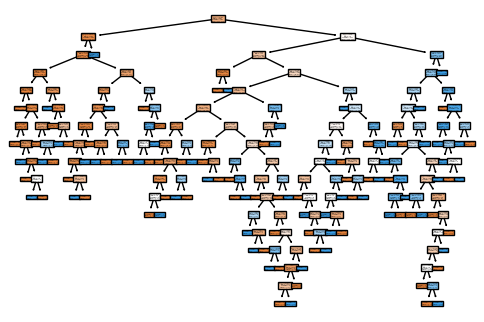

In [16]:
# Plotando a árvore
tree.plot_tree(arv, filled=True)

### Avaliando o algoritmo de Árvore de Decisão

In [17]:
print(classification_report(y_test, y_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       234
           1       0.53      0.59      0.56        66

    accuracy                           0.79       300
   macro avg       0.70      0.72      0.71       300
weighted avg       0.80      0.79      0.80       300



![](Images/metricas.JPG)

In [18]:
confusion_matrix(y_test, y_pred)

array([[199,  35],
       [ 27,  39]], dtype=int64)

![](Images/Matriz1.JPG)
![](Images/Matriz2.JPG)

Das 226 pessoas da amostra que ganham menos de 25K, 199 foram previstas corretamente, enquanto 27 foram preditas ganhando mais de 25K. Já das 74 pessoas da amostra que ganham mais de 25K, 39 foram previstas corretamente, enquanto 35 foram preditas ganhando menos de 25K.

### Persistindo o algoritmo de Árvore de Decisão com o joblib

In [19]:
arq_arv = 'ARV_SocioTorcedor.sav'
joblib.dump(arv,arq_arv)

['ARV_SocioTorcedor.sav']

In [20]:
arv_carregado = joblib.load(arq_arv)
resultado = arv_carregado.score(X_test, y_test)
print(resultado)

0.7933333333333333


#### ACURÁCIA FINAL = 79,3%